In [1]:
!ls ../build/src/

CMakeFiles	     knn				     main      toto
cmake_install.cmake  libimp.cpython-312-x86_64-linux-gnu.so  Makefile


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
sys.path.insert(0,'../build/src/')
import libimp

In [4]:
help(libimp)

Help on module libimp:

NAME
    libimp - Pybind11 library for the Interval Matrix Profile (IMP). There is currently only the STOMP implementation for float and double data. It is parallel

FUNCTIONS
    STOMP_double(...) method of builtins.PyCapsule instance
        STOMP_double(time_series: numpy.ndarray[numpy.float64], window_size: int, exclude: int, block_width: int, block_height: int) -> tuple[list[float], list[int]]

        Compute the Matrix Profile using the STOMP algorithm. The parameters are as follows:
                time_series: numpy array, the time series data,
                window_size: int, the size of the subsequences,
                exclude: int, the size of the exclusion zone,
                block_width: int, the width of the blocks,
                block_height: int, the height of the blocks.

                Returns a tuple of two numpy arrays: the Matrix Profile and the Matrix Profile Index.

    STOMP_float(...) method of builtins.PyCapsule instance
       

In [4]:
data_path = "../Data/climate_pulse/SST/"
ts_sst = np.load(data_path+"daily_series.npy").astype(np.float64)
date_sst = np.load(data_path+"daily_series_date.npy")

In [5]:
window_size = 7
interval_length = 61
exclude = 7
start_year = np.datetime64(date_sst[0], 'Y').astype(int) + 1970
end_year = np.datetime64(date_sst[-1], 'Y').astype(int) + 1970
period_starts = []
for year in range(start_year, end_year+1):
    period_starts.append(np.where(date_sst == np.datetime64(str(year) + "-01-01"))[0][0])

In [6]:
%%time
output = libimp.imp_STOMP_double(ts_sst, window_size, period_starts, interval_length, exclude)
_imp, _id_imp = output 

CPU times: user 1.45 s, sys: 2.02 ms, total: 1.45 s
Wall time: 157 ms


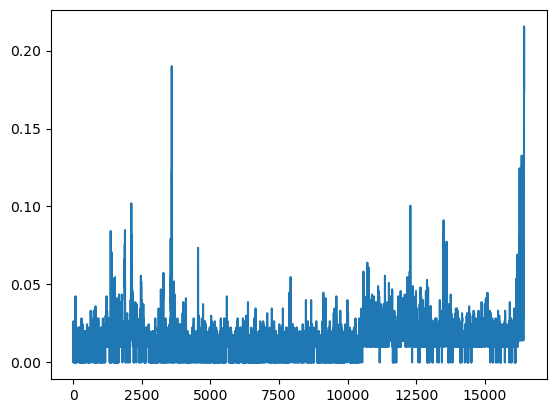

In [7]:
plt.plot(_imp)

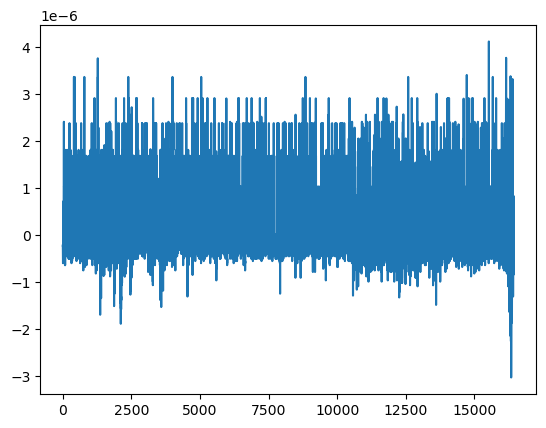

In [8]:
oldimp = np.load("imp.npy")

plt.plot(_imp-oldimp)